<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Singapore-Data" data-toc-modified-id="Singapore-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Singapore Data</a></span></li><li><span><a href="#Load-data,-Fit-Model" data-toc-modified-id="Load-data,-Fit-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data, Fit Model</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li><li><span><a href="#Commentary" data-toc-modified-id="Commentary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Commentary</a></span><ul class="toc-item"><li><span><a href="#26th-Apr" data-toc-modified-id="26th-Apr-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>26th Apr</a></span></li></ul></li></ul></div>

## Singapore Data
## Load data, Fit Model

In [1]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry
import pandas as pd

# Load data
country = 'Singapore'
filepath = '../data/raw/'
fix_data = {}

sn = CovidCountry(country=country,
                  filepath=filepath,
                  fixes=fix_data)

sn.load()

In [2]:
sn.fit(curve='gamma')
sn_df = sn.predict()
sn.save(filepath='../data/processed/')

In [3]:
# Show small window of prediction and actual
sn_df[pd.Timestamp.now().date()-pd.Timedelta('3D'):].diff()[1:6]

,Actual,Prediction
Date,,
2020-06-25,113.0,56.404435
2020-06-26,219.0,53.008167
2020-06-27,NaN,49.789940
2020-06-28,NaN,46.742829
2020-06-29,NaN,43.859974


## Display Actual vs Prediction

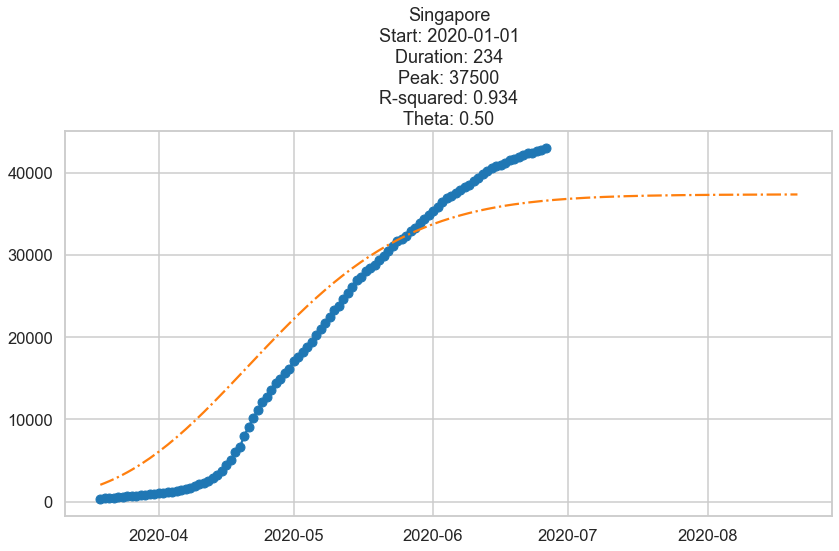

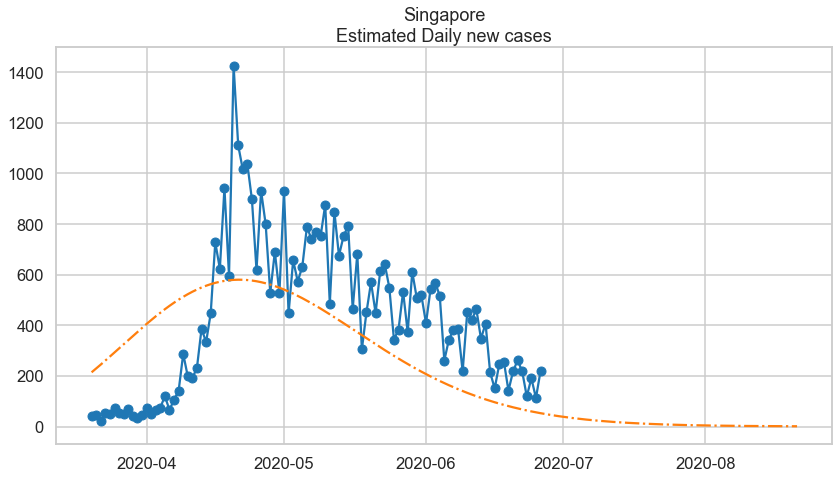

In [4]:
sn.display(offset=100)

## Commentary
### 26th Apr
Added today. Singapore did an amazing job. However, they have recently been caught by a second peak from their immigrant population who live in cramped conditions. This might be better modeled as first and second wave curves. Trying to fit one curve to both gives a poor fit, and probably doesn't make sense. The key takeway is that even Singapore had a surprise - and that was much larger than the first wave of cases.